In [1]:
import pandas as pd
import numpy as np

In [2]:
maps_ratings = pd.read_csv('attractions_ratings.csv')

In [3]:
maps_ratings.head()

,Name,Url,Telephone,Latitude,Longitude,Address,County,Tags,Rating
0,Hungry Boba Pizzeria,https://www.hungrybobapizzeria.ie/,0035316336814,53.351338,-6.279546,"Unit 4, 8 Grangegorman Lower, Dublin, D07 X97Y",Dublin,"Activity,Food and Drink,Experience,Restaurant,...",3.9
1,A Rural Experience Day Tours,http://www.aruralexperience.com,00353567727590,52.629797,-7.074240,"Castlefield, Gowran,",Kilkenny,"Activity,Experience,Activity Operator,Tour",0.0
2,Teach an Tae Aran Café & Tea Rooms,https://www.cafearan.ie/,003539975092,53.065461,-9.525287,"Inisheer, Aran Islands,",Galway,"Activity,Food and Drink,Experience,Cafe,Food S...",4.7
3,A Heritage Walk of Old Galway,NaN,00353863480958,53.272179,-9.049473,"Mr Liam Silke, Galway City Centre,",Galway,"Activity,Experience,Walking ,Walking,Activity ...",4.3
4,A Spasso A Dublino - Italian Tour in Dublin,https://www.aspassoperdublino.com/,00353899644861,53.342240,-6.251648,"15 Bawnville Close, ,",Dublin,"Activity,Walking ,Walking,Activity Operator,Tour",5.0


In [4]:
maps_ratings.isnull().sum()

Name           0
Url          427
Telephone    664
Latitude       0
Longitude      0
Address        0
County        27
Tags           0
Rating       346
dtype: int64

In [5]:
maps_ratings['Rating'].fillna(maps_ratings['Rating'].mean(), inplace=True)

In [6]:
maps_ratings.isnull().sum()

Name           0
Url          427
Telephone    664
Latitude       0
Longitude      0
Address        0
County        27
Tags           0
Rating         0
dtype: int64

In [7]:
maps_ratings['County'].fillna(maps_ratings['County'].mode()[0], inplace=True)

In [8]:
maps_ratings.isnull().sum()

Name           0
Url          427
Telephone    664
Latitude       0
Longitude      0
Address        0
County         0
Tags           0
Rating         0
dtype: int64

In [9]:
maps_ratings.drop(['Url', 'Telephone'], axis=1, inplace=True)

In [10]:
maps_ratings.isnull().sum()

Name         0
Latitude     0
Longitude    0
Address      0
County       0
Tags         0
Rating       0
dtype: int64

In [11]:
maps_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       5954 non-null   object 
 1   Latitude   5954 non-null   float64
 2   Longitude  5954 non-null   float64
 3   Address    5954 non-null   object 
 4   County     5954 non-null   object 
 5   Tags       5954 non-null   object 
 6   Rating     5954 non-null   float64
dtypes: float64(3), object(4)
memory usage: 325.7+ KB


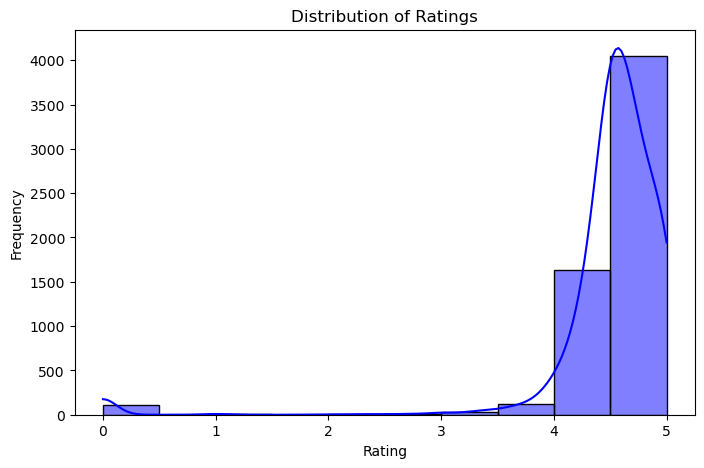

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(maps_ratings['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

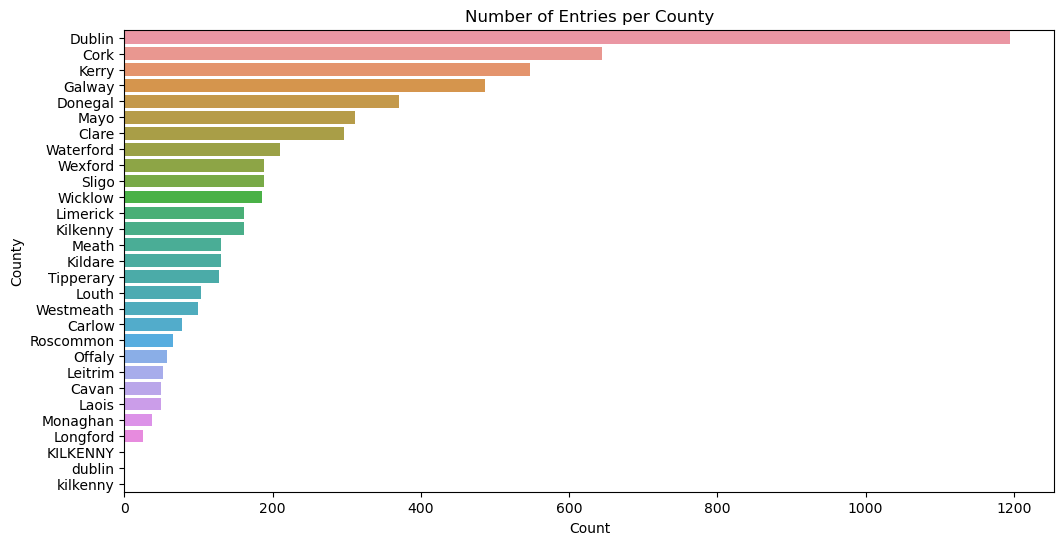

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=maps_ratings, y='County', order=maps_ratings['County'].value_counts().index)
plt.title('Number of Entries per County')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()

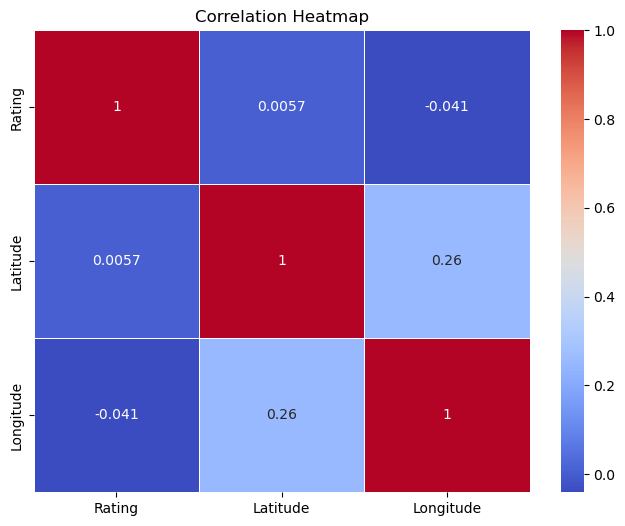

In [14]:
#Correlation of continuous variables


plt.figure(figsize=(8, 6))
sns.heatmap(maps_ratings[['Rating', 'Latitude', 'Longitude']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
all_tags = maps_ratings['Tags'].dropna().astype(str).str.split(',').sum()

In [16]:
# all_tags

In [17]:
# TOkenization of tags to consider each tag as a sperate string

tokenized_tags = ' '.join([tag.strip() for tag in all_tags])

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(tokenized_tags)

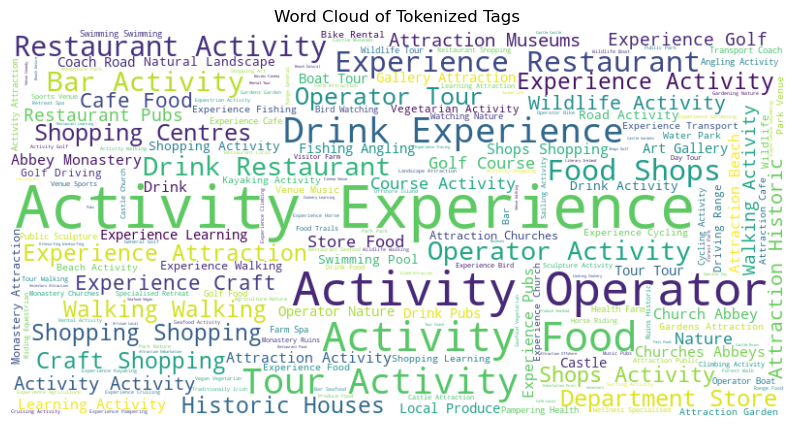

In [19]:
# Word Cloud to see distribution of tags

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokenized Tags')
plt.show()

In [20]:
maps_ratings.isnull().sum()

Name         0
Latitude     0
Longitude    0
Address      0
County       0
Tags         0
Rating       0
dtype: int64

In [21]:
maps_ratings.to_csv('cleaned_maps_ratings.csv')